# Lab 1 Analysis Example using Thicket

In [94]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [95]:
tk = th.Thicket.from_caliperreader(glob("*random.cali")) # dividing it by input type for now
tk.statsframe.dataframe["time"] = 1

In [96]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 MPI_Barrier
│  └─ 1.000 comm_large
│     ├─ 1.000 MPI_Gather
│     └─ 1.000 MPI_Scatter
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [97]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              9742141       1   
                                                  94276197      1   
                                                  219033091     1   
                                                  270679408     1   
                                                  684115475     1   
                                                  735439924     1   
                                                  780855582     1   
                                                  915979141     1   
                                                  1114154223    1   
                                                  1334158880    1   
                                                  1378584133    1   
                                                  1623070311    1   
                                                  1838932625    1   
                                                  1898519320    1   
                                                  2001593674    1   
                                                  2004720918    1   
                                                  2039840440    1   
                                                  2094734167    1   
                                                  2182384055    1   
                                                  2267451053    1   
                                                  2344695629    1   
                                                  2521245310    1   
                                                  2526295470    1   
                                                  2607152813    1   
                                                  3070090970    1   
                                                  3155404198    1   
                                                  3163098158    1   
                                                  3183325288    1   
                                                  3211007287    1   
                                                  3214940410    1   
                                                  3221082979    1   
                                                  3285088629    1   
                                                  3576837185    1   
                                                  3898863712    1   
                                                  4075680148    1   
                                                  4102926110    1   
                                                  4175302609    1   
                                                  4235843964    1   
{'name': 'comm', 'type': 'function'}              9742141       3   
                                                  94276197      3   
                                                  219033091     3   
                                                  270679408     3   
                                                  684115475     3   
                                                  735439924     3   
                                                  780855582     3   
                                                  915979141     3   
                                                  1114154223    3   
                                                  1334158880    3   
                                                  1378584133    3   
                                                  1623070311    3   
                                                  1838932625    3   
                                                  1898519320    3   
                                                  2001593674    3   
                                                  2004720918    3   
                                                  2039840440    3   
                                                  2094734167    3   
                                                  2182384055

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [98]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
9742141,2.11.0-dev,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p512-a65536-random.cali,true,1700078667,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 65536, random]",c,OddEvenSort,MPI,float,4,65536,Random,512,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
94276197,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a1048576-random.cali,true,1700089931,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 1048576, random]",c,OddEvenSort,MPI,float,4,1048576,Random,2,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
219033091,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a4194304-random.cali,true,1700104618,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 4194304, random]",c,OddEvenSort,MPI,float,4,4194304,Random,64,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
270679408,2.11.0-dev,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p512-a262144-random.cali,true,1700091600,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 262144, random]",c,OddEvenSort,MPI,float,4,262144,Random,512,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
684115475,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a262144-random.cali,true,1700004546,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 262144, random]",c,OddEvenSort,MPI,float,4,262144,Random,4,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
735439924,2.11.0-dev,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p256-a65536-random.cali,true,1700074211,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 65536, random]",c,OddEvenSort,MPI,float,4,65536,Random,256,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
780855582,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a65536-random.cali,true,1700066004,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 65536, random]",c,OddEvenSort,MPI,float,4,65536,Random,16,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
915979141,2.11.0-dev,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p256-a4194304-random.cali,true,1700091965,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 4194304, random]",c,OddEvenSort,MPI,float,4,4194304,Random,256,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...
1114154223,2.11.0-dev,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p512-a1048576-random.cali,true,1700081812,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./oddEvenMPI, 1048576, random]",c,OddEvenSort,MPI,float,4,1048576,Random,512,1,19,Used lab 2 and https://www.geeksforgeeks.org/i...


In [99]:
gb = tk.groupby("InputSize")

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b654abb16d0>, 262144: <thicket.thicket.Thicket object at 0x2b654a94f280>, 1048576: <thicket.thicket.Thicket object at 0x2b654ab38b20>, 4194304: <thicket.thicket.Thicket object at 0x2b654abac4c0>, 16777216: <thicket.thicket.Thicket object at 0x2b654ad43d00>}


Compose these 3 groups column-wise to get a holistic view of the data

In [100]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="mpi.world.size"
)

In [101]:
ctk.dataframe

65536  \
                                                                   nid   
node                                              mpi.world.size         
{'name': 'main', 'type': 'function'}              2                  1   
                                                  4                  1   
                                                  8                  1   
                                                  16                 1   
                                                  32                 1   
                                                  64                 1   
                                                  128                1   
                                                  256                1   
                                                  512                1   
{'name': 'comm', 'type': 'function'}              2                  3   
                                                  4                  3   
                                                  8                  3   
                                                  16                 3   
                                                  32                 3   
                                                  64                 3   
                                                  128                3   
                                                  256                3   
                                                  512                3   
{'name': 'MPI_Barrier', 'type': 'function'}       2                  4   
                                                  4                  4   
                                                  8                  4   
                                                  16                 4   
                                                  32                 4   
                                                  64                 4   
                                                  128                4   
                                                  256                4   
                                                  512                4   
{'name': 'comm_large', 'type': 'function'}        2                  5   
                                                  4                  5   
                                                  8                  5   
                                                  16                 5   
                                                  32                 5   
                                                  64                 5   
                                                  128                5   
                                                  256                5   
                                                  512                5   
{'name': 'MPI_Gather', 'type': 'function'}        2                  9   
                                                  4                  9   
                                                  8                  9   
                                                  16                 9   
                                                  32                 9   
                                                  64                 9   
                                                  128                9   
                                                  256                9   
                                                  512                9   
{'name': 'MPI_Scatter', 'type': 'function'}       2                  6   
                                                  4                  6   
                                                  8                  6   
                                                  16                 6   
                                                  32                 6   
                                                  64                 6   
                                                  128                

Perform pandas operations to get the table in a desirable format for plotting

In [102]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid"), (16777216, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel"), (16777216, "spot.channel")], axis=1)

# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("mpi.world.size", ""): "mpi.world.size"}).set_index(["name", "mpi.world.size"])
ctk.dataframe

index         65536                \
                                       Min time/rank Max time/rank   
name              mpi.world.size                                     
main              2                  0      3.665113      3.768630   
                  4                  1      4.066194      4.125003   
                  8                  2     14.419187     14.488508   
                  16                 3      1.853211      1.986136   
                  32                 4      7.247276      7.683664   
                  64                 5     10.206796     11.080635   
                  128                6      9.360718     10.340432   
                  256                7      6.555480     10.390102   
                  512                8     15.695221     17.377090   
comm              2                  9      0.022587      0.023304   
                  4                 10      0.029604      0.063996   
                  8                 11      0.069524      0.146394   
                  16                12      0.116988      0.239310   
                  32                13      0.278453      0.674290   
                  64                14      0.078722      0.690726   
                  128               15      0.246517      0.865454   
                  256               16      0.594091      1.660640   
                  512               17      1.410786      2.830867   
MPI_Barrier       2                 18      0.011269      0.014011   
                  4                 19      0.029385      0.046591   
                  8                 20      0.069351      0.110621   
                  16                21      0.066886      0.205174   
                  32                22      0.278253      0.587449   
                  64                23      0.052082      0.511110   
                  128               24      0.100715      0.783043   
                  256               25      0.320862      1.001154   
                  512               26      0.027198      1.636797   
comm_large        2                 27      0.008523      0.011992   
                  4                 28      0.000172      0.025624   
                  8                 29      0.000119      0.075536   
                  16                30      0.000131      0.064081   
                  32                31      0.000123      0.310797   
                  64                32      0.000106      0.280003   
                  128               33      0.000105      0.449159   
                  256               34      0.069816      1.274713   
                  512               35      0.957854      1.499656   
MPI_Gather        2                 36      0.000197      0.011622   
                  4                 37      0.000088      0.025411   
                  8                 38      0.000045      0.075313   
                  16                39      0.000041      0.033725   
                  32                40      0.000040      0.310407   
                  64                41      0.000036      0.279737   
                  128               42      0.000034      0.241227   
                  256               43      0.057757      1.198661   
                  512               44      0.084479      0.660947   
MPI_Scatter       2                 45      0.000331      0.008281   
                  4                 46      0.000053      0.000171   
                  8                 47      0.000042      0.000180   
                  16                48      0.000045      0.063968   
                  32                49      0.000040      0.000328   
                  64                50      0.000034      0.150457   
                  128               51      0.000030      0.207863   
                  256               52      0.000030      0.673999   
                  512               53      0.564103      1.355890   
comp              2                 54     

In [103]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
print(function_names)
processes = sorted(list(set(ctk.dataframe.index.get_level_values("mpi.world.size"))))
print(processes)
array_sizes = [65536, 262144, 1048576] # append as necessary
print(array_sizes)

{'MPI_Scatter', 'comp', 'comm', 'comp_large', 'correctness_check', 'comm_large', 'MPI_Gather', 'main', 'MPI_Barrier', 'data_init'}
[2, 4, 8, 16, 32, 64, 128, 256, 512]
[65536, 262144, 1048576]


In [104]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(
        4,df[0],
        marker='o',
    )
    

    ax.plot(
        8,df[1],
        marker='o',
    )
    
    ax.plot(
        16, df[2],
        marker='o',
    )
    
    ax.plot(
        32, df[3],
        marker='o',
    )
    
    ax.plot(
        64, df[4],
        marker='o',
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    plt.legend(["65536 Values", "262144 Values", "1048576 Values", "4194304 Values", "16777216 Values"]) 
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks([4, 8, 16, 32, 64])
    plt.show()
    return fig, ax

In [105]:
print(ctk.dataframe.loc[name][65536]["Avg time/rank"][2])
print(ctk.dataframe.loc[name][262144]["Avg time/rank"][4])
data = [ctk.dataframe.loc[name][65536]["Avg time/rank"][2], ctk.dataframe.loc[name][262144]["Avg time/rank"][4]]
print(data)

3.366072
55.283152
[3.366072, 55.283152]


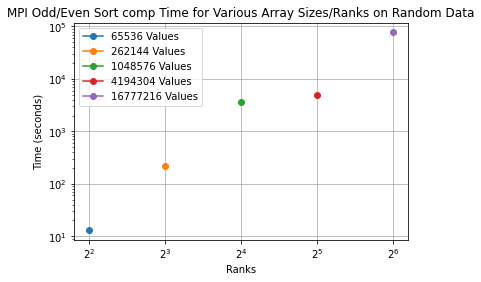

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'MPI Odd/Even Sort comp Time for Various Array Sizes/Ranks on Random Data'}, xlabel='Ranks', ylabel='Time (seconds)'>)

In [106]:
name = "comp"
arraySize = 1048576
plot_mpl(
    df=[ctk.dataframe.loc[name][65536]["Total time"][4], 
        ctk.dataframe.loc[name][262144]["Total time"][8],
        ctk.dataframe.loc[name][1048576]["Total time"][16],
        ctk.dataframe.loc[name][4194304]["Total time"][32],
       ctk.dataframe.loc[name][16777216]["Total time"][64]],
    title="MPI Odd/Even Sort {} Time for Various Array Sizes/Ranks on Random Data".format(name),
    xlabel="Ranks",
    ylabel="Time (seconds)",
)

In [107]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(
        df[0],
        marker='o',
    )
    

    ax.plot(
        df[1],
        marker='o',
    )
    
    ax.plot(
        df[2],
        marker='o',
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    plt.legend(["Max time/rank", "Min time/rank", "Avg time/rank"]) 
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(processes)
    plt.show()
    return fig, ax

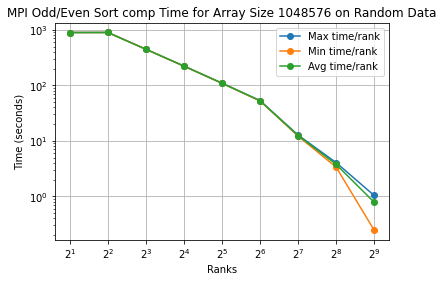

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'MPI Odd/Even Sort comp Time for Array Size 1048576 on Random Data'}, xlabel='Ranks', ylabel='Time (seconds)'>)

In [108]:
name = "comp"
arraySize = 1048576
plot_mpl(
    df=[ctk.dataframe.loc[name][arraySize]["Max time/rank"], 
        ctk.dataframe.loc[name][arraySize]["Min time/rank"],
       ctk.dataframe.loc[name][arraySize]["Avg time/rank"]],
    title="MPI Odd/Even Sort {} Time for Array Size {} on Random Data".format(name, arraySize),
    xlabel="Ranks",
    ylabel="Time (seconds)",
)
